<a href="https://colab.research.google.com/github/VT-Gidieon/COURSERA-SQL_FOR_DS/blob/master/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [0]:
url = "https://raw.githubusercontent.com/VT-Gidieon/Covid_W_Analysis/master/covid19.csv"
df = pd.read_csv(url)

In [5]:
df

,country,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,active_critical,total_tests,population
0,USA,1621196,294,96359,5.0,382244,1142593,17907,13479242,330790544
1,Russia,326448,8894,3249,150.0,99825,223374,2300,8126626,145927804
2,Brazil,310921,0,20082,0.0,125960,164879,8318,735224,212393298
3,Spain,280117,0,27940,0.0,196958,55219,1152,3037840,46752851
4,UK,250908,0,36042,0.0,1918,212948,1559,3090566,67847158
...,...,...,...,...,...,...,...,...,...,...
208,St. Barth,6,0,0,0.0,6,0,0,0,9874
209,Western Sahara,6,0,0,0.0,6,0,0,0,595583
210,Anguilla,3,0,0,0.0,3,0,0,0,14988
211,Lesotho,1,0,0,0.0,0,1,0,0,2140374


In [29]:
df.describe

<bound method NDFrame.describe of                    country  total_cases  ... total_tests  population
0                      USA      1621196  ...    13479242   330790544
1                   Russia       326448  ...     8126626   145927804
2                   Brazil       310921  ...      735224   212393298
3                    Spain       280117  ...     3037840    46752851
4                       UK       250908  ...     3090566    67847158
..                     ...          ...  ...         ...         ...
208              St. Barth            6  ...           0        9874
209         Western Sahara            6  ...           0      595583
210               Anguilla            3  ...           0       14988
211                Lesotho            1  ...           0     2140374
212  Saint Pierre Miquelon            1  ...           0        5797

[213 rows x 10 columns]>

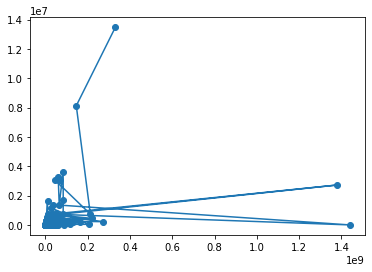

In [30]:
import matplotlib.pyplot as plt

plt.scatter(df.population, df.total_tests)
plt.plot(df.population, df.total_tests)

In [0]:
df1 = df.drop(columns=["country"])

In [32]:
df1.head()

,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,active_critical,total_tests,population
0,1621196,294,96359,5.0,382244,1142593,17907,13479242,330790544
1,326448,8894,3249,150.0,99825,223374,2300,8126626,145927804
2,310921,0,20082,0.0,125960,164879,8318,735224,212393298
3,280117,0,27940,0.0,196958,55219,1152,3037840,46752851
4,250908,0,36042,0.0,1918,212948,1559,3090566,67847158


In [0]:
X = df1.drop(columns=['new_cases'])
y = df1['new_cases']

In [34]:
for i in range(213):    
    if(type(y[i]) == str):
        a = y[i].replace(',','')
        a = int(a)
        y[i] = a

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

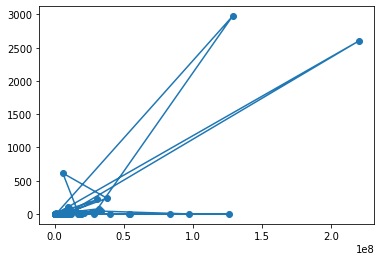

In [36]:
plt.scatter(X_test.population, y_test)
plt.plot(X_test.population, y_test)

In [0]:
from sklearn import ensemble
model = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2, learning_rate=0.01, loss='ls')

In [38]:
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
model.predict(X_test)

array([ 4.55340724e+00,  2.02135671e+00,  3.96770652e+00,  2.02135671e+00,
        2.35721393e+02,  5.37949216e+01,  8.73600228e+03,  3.06920510e+00,
        1.09603579e+01,  2.02135671e+00,  2.02135671e+00,  2.02135671e+00,
        5.30359052e+00,  5.30359052e+00,  2.12984622e+00,  2.02135671e+00,
        2.02135671e+00,  1.33465795e+03,  1.93934140e+00,  2.02135671e+00,
        2.22074490e+00,  2.02135671e+00,  2.02135671e+00,  2.02135671e+00,
        2.12984622e+00,  1.53488959e+01,  8.90515800e+00,  1.07383924e+00,
        2.12984622e+00, -4.76350774e-01,  3.96588597e+00,  2.02135671e+00,
        2.05873520e+01,  5.19510101e+00,  1.52185560e+02,  2.02135671e+00,
        2.12984622e+00,  2.02135671e+00,  5.08587635e+00,  2.02630920e+00,
        2.12984622e+00,  2.02135671e+00,  1.89217369e+00,  2.22074490e+00,
        2.02135671e+00,  2.02135671e+00,  5.30359052e+00,  3.06920510e+00,
        2.12984622e+00,  2.02135671e+00,  2.84027866e+00,  2.82371085e+00,
        1.68880127e+02,  

In [40]:
from sklearn.metrics import accuracy_score
model.score(X_test, y_test)

-1.3247130404956375

In [0]:
pred = model.predict(X_test)

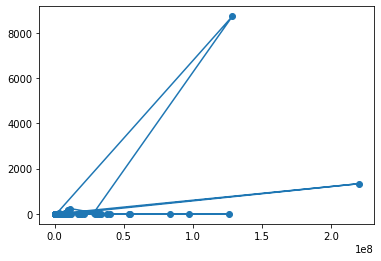

In [42]:
plt.scatter(X_test.population, pred)
plt.plot(X_test.population, pred)

In [43]:
a_pred = model.predict(X)
a_pred

array([ 2.89328771e+02,  8.73600228e+03,  4.16991824e+00,  4.16991824e+00,
        4.16991824e+00,  4.16991824e+00,  4.16991824e+00,  4.55340724e+00,
        4.16991824e+00,  4.55340724e+00,  1.17323949e+03,  4.16991824e+00,
        2.64948819e+00,  4.16991824e+00,  4.55340724e+00,  8.73600228e+03,
       -4.76350774e-01,  4.16991824e+00,  1.33465795e+03, -3.83451221e-01,
        1.06215287e+01,  7.02821111e-02,  7.02821111e-02,  7.02821111e-02,
        2.82371085e+00,  1.07383924e+00,  1.66524626e+03,  5.84536027e+00,
        6.02343645e+00,  2.71522134e+00,  8.90515800e+00,  1.28079920e+00,
        4.33249786e+02,  8.13734090e-01, -2.16395880e-02,  8.68499184e-02,
        6.23976669e+00,  2.55082896e+00,  2.84027866e+00,  2.84027866e+00,
        8.13734090e-01,  2.78822635e-01,  1.59917695e+02,  3.85739646e+00,
        1.79594961e+01,  1.93934140e+00,  1.77483944e+00,  8.13734090e-01,
        5.31961200e+02,  3.89783070e+00,  1.83085189e+00,  3.66841901e+00,
        2.13479870e+00,  

In [44]:
model.score(X, y)

0.6400005465342345

In [45]:
print("Predictions: \n")

for i in range(212):
    
    print("New cases for",df['country'][i],": ",a_pred[i])

Predictions: 

New cases for USA :  289.3287705227515
New cases for Russia :  8736.002278280213
New cases for Brazil :  4.169918240067875
New cases for Spain :  4.169918240067875
New cases for UK :  4.169918240067875
New cases for Italy :  4.169918240067875
New cases for France :  4.169918240067875
New cases for Germany :  4.55340723559046
New cases for Turkey :  4.169918240067875
New cases for Iran :  4.55340723559046
New cases for India :  1173.2394890513349
New cases for Peru :  4.169918240067875
New cases for China :  2.649488192907652
New cases for Canada :  4.169918240067875
New cases for Saudi Arabia :  4.55340723559046
New cases for Mexico :  8736.002278280213
New cases for Chile :  -0.47635077438784634
New cases for Belgium :  4.169918240067875
New cases for Pakistan :  1334.6579450754532
New cases for Netherlands :  -0.3834512209052758
New cases for Qatar :  10.621528724084962
New cases for Ecuador :  0.07028211111304306
New cases for Belarus :  0.07028211111304306
New cases 

In [46]:
final_result = pd.DataFrame({"country":df['country'],"new_cases":a_pred})
final_result

,country,new_cases
0,USA,289.328771
1,Russia,8736.002278
2,Brazil,4.169918
3,Spain,4.169918
4,UK,4.169918
...,...,...
208,St. Barth,2.021357
209,Western Sahara,2.021357
210,Anguilla,2.021357
211,Lesotho,2.021357


In [0]:
final_result.to_csv("New_Cases_Predictions.csv", index=False)